In [2]:
import Pkg
Pkg.activate("../../Tasks2D")

import LineWorlds
const L = LineWorlds

  Activating project at `~/Developer/research/summer2023/tasks2d/Tasks2D`


LineWorlds

In [3]:
Pkg.add("VoxelRayTracers")

   Resolving package versions...


    Updating `~/Developer/research/summer2023/tasks2d/Tasks2D/Project.toml`
  [d9e3e1c4] + VoxelRayTracers v0.1.5
    Updating `~/Developer/research/summer2023/tasks2d/Tasks2D/Manifest.toml`


  [dce04be8] + ArgCheck v2.3.0
  [d9e3e1c4] + VoxelRayTracers v0.1.5


Precompiling project...


  ✓ GenPOMDPs


  ✓ Tasks2D
  2 dependencies successfully precompiled in 9 seconds. 302 already precompiled. 1 skipped during auto due to previous errors.


In [4]:
using VoxelRayTracers

In [115]:
(_segs, _bb, _center) = L.load_env_sparse("/Users/georgematheos/Developer/research/summer2023/tasks2d/data/environments", 4)# L.load_env_sparse("/Users/georgematheos/Developer/research/summer2023/tasks2d/data/environments/ambig.json")

(_segs = LineWorlds.Geometry.Segment[LineWorlds.Geometry.Segment([0.12, 0.1], [0.11, 0.11]), LineWorlds.Geometry.Segment([0.11, 0.11], [0.11, 4.18]), LineWorlds.Geometry.Segment([0.11, 4.18], [4.38, 4.18]), LineWorlds.Geometry.Segment([4.38, 4.18], [4.39, 4.19]), LineWorlds.Geometry.Segment([4.39, 4.19], [4.39, 4.26]), LineWorlds.Geometry.Segment([4.39, 4.26], [4.4, 4.27]), LineWorlds.Geometry.Segment([4.4, 4.27], [4.4, 6.25]), LineWorlds.Geometry.Segment([4.4, 6.25], [4.39, 6.26]), LineWorlds.Geometry.Segment([4.39, 6.26], [4.29, 6.26]), LineWorlds.Geometry.Segment([4.29, 6.26], [4.28, 6.25])  …  LineWorlds.Geometry.Segment([5.75, 2.97], [5.74, 2.98]), LineWorlds.Geometry.Segment([5.74, 2.98], [5.62, 2.98]), LineWorlds.Geometry.Segment([5.62, 2.98], [5.61, 2.97]), LineWorlds.Geometry.Segment([5.61, 2.97], [5.61, 0.13]), LineWorlds.Geometry.Segment([5.61, 0.13], [5.6, 0.12]), LineWorlds.Geometry.Segment([5.6, 0.12], [4.13, 0.12]), LineWorlds.Geometry.Segment([4.13, 0.12], [4.12, 0.11])

In [116]:
_bb

([0.1, 0.1], [11.83, 10.89])

In [117]:
ϵ = 0.1
(x1, y1), (x2, y2) = _bb
edges = ((x1 - ϵ):ϵ:(x2 + ϵ), (y1 - ϵ):ϵ:(y2 + ϵ))

(0.0:0.1:11.9, 0.0:0.1:10.9)

In [118]:
G = L.Geometry

LineWorlds.Geometry

In [119]:
G.diff(_segs[6])

2-element Vector{Float64}:
 0.010000000000000675
 0.009999999999999787

In [120]:
G.Segment(_segs[6].x * 100, _segs[6].y * 100)

LineWorlds.Geometry.Segment([438.99999999999994, 426.0], [440.00000000000006, 426.99999999999994])

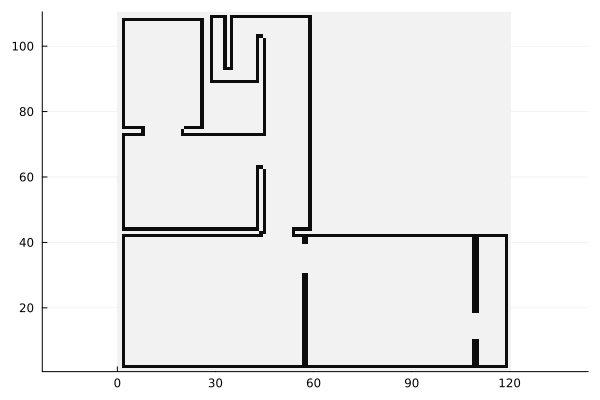

In [122]:
grid = [false for _ in edges[1], _ in edges[2]]
for seg in _segs
    if G.diff(seg) ≈ [0, 0]
        continue
    end
    ray = (position=seg.x, velocity=G.diff(seg))
    for hit in eachtraversal(ray, edges)
                                # TODO: is this a hack or no?
        if hit.exit_time ≤ 1. #|| (hit.entry_time == 1.0 && (ray.velocity[1] > 0 || ray.velocity[2] > 0))
            grid[hit.voxelindex] = true
        end
    end
end
heatmap(transpose(map(x -> x ? 0 : 1, grid)), aspect_ratio=:equal, color=:grays, cbar=false)

In [75]:
seg = _segs[6]
ray=(position=seg.x, velocity=G.diff(seg)/1000)
eachtraversal(ray, edges)|>collect

55-element Vector{NamedTuple{(:voxelindex, :entry_time, :exit_time), Tuple{CartesianIndex{2}, Float64, Float64}}}:
 (voxelindex = CartesianIndex(2, 22), entry_time = 0.0, exit_time = 25.0)
 (voxelindex = CartesianIndex(3, 22), entry_time = 25.0, exit_time = 50.0)
 (voxelindex = CartesianIndex(4, 22), entry_time = 50.0, exit_time = 75.0)
 (voxelindex = CartesianIndex(5, 22), entry_time = 75.0, exit_time = 100.0)
 (voxelindex = CartesianIndex(6, 22), entry_time = 100.0, exit_time = 125.0)
 (voxelindex = CartesianIndex(7, 22), entry_time = 125.0, exit_time = 150.0)
 (voxelindex = CartesianIndex(8, 22), entry_time = 150.0, exit_time = 175.0)
 (voxelindex = CartesianIndex(9, 22), entry_time = 175.0, exit_time = 200.0)
 (voxelindex = CartesianIndex(10, 22), entry_time = 200.0, exit_time = 225.0)
 (voxelindex = CartesianIndex(11, 22), entry_time = 225.0, exit_time = 250.0)
 ⋮
 (voxelindex = CartesianIndex(48, 22), entry_time = 1150.0, exit_time = 1175.0)
 (voxelindex = CartesianIndex(49, 22),

In [76]:
edges[1][56]

5.4

In [52]:
using Plots

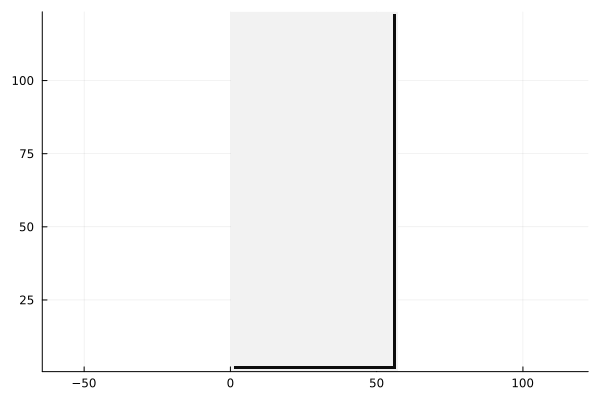

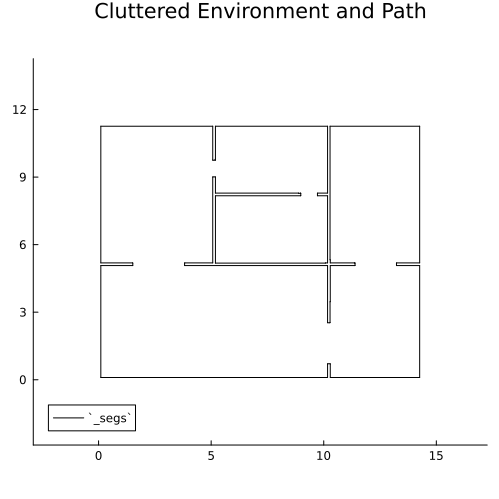

In [104]:
mypl = plot(size=(500,500), aspect_ratio=:equal, title="Cluttered Environment and Path", grid=false,
xlim=(_bb[1][1]-3, _bb[2][1]+3),
ylim=(_bb[1][2]-3, _bb[2][2]+3),
legend=:bottomleft,
)
plot!(_segs, c=:black, label="`_segs`")

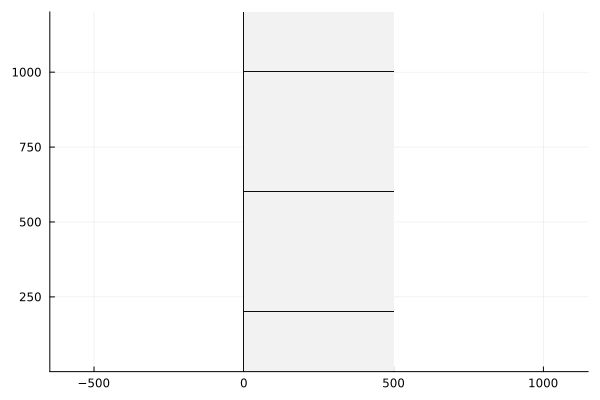

In [68]:
edges = (0:1:500, 0:1:1200)

grid = [false for _ in edges[1], _ in edges[2]]
for seg in _segs
    seg = G.Segment(100 * seg.x, 100 * seg.y)
    if G.diff(seg) ≈ [0, 0]
        continue
    end
    ray = (position=seg.x, velocity=G.diff(seg))
    for hit in eachtraversal(ray, edges)
        grid[hit.voxelindex] = true
    end
end
heatmap(transpose(map(x -> x ? 0 : 1, grid)), aspect_ratio=:equal, color=:grays, cbar=false)